In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
""" Split data into separate dataframes for plotting. Plots replicates
    if present in different hue in the same column. """

# Get paths to datafiles.
datadir = "data/"
datapaths = []
for subdir in os.listdir(datadir):
    analysisdir = os.path.join(datadir, subdir)
    if os.path.isdir(analysisdir):
        for datafile in os.listdir(analysisdir):
            if "somaoverneuro" in datafile:
                datapaths.append(os.path.join(analysisdir, datafile))

sDF=[] # Soma DF/F0
nDF= [] # Npil DF/F0
SoverNDF=[] # Soma/Npil DF/F0
SoverNraw = []
namelist = []

# Check for replicate experiments.
for path in datapaths:
    replicate = 1
    data = pd.read_csv(path)
    name = path[5:15]
    if name in namelist:
        replicate += namelist.count(name)
    namelist.append(name)

    for i, value in enumerate(data["Soma DF/F0"]):
        sDF.append([name, replicate, value])
    for i, value in enumerate(data["Npil DF/F0"]):
        nDF.append([name, replicate, value])
    for i, value in enumerate(data["Soma/Npil DF/F0"]):
        SoverNDF.append([name, replicate, value])
    for i, value in enumerate(data["Soma/Npil raw"]):
        SoverNraw.append([name, replicate, value])

sDFframe = pd.DataFrame(sDF, columns=["Name", "Replicate", "Values"])
sDFnames = np.unique(sDFframe.Name)
sDFavgs = sDFframe.groupby(['Replicate', 'Name']).mean()
sDFavgs.reset_index(inplace=True)

nDFframe = pd.DataFrame(nDF, columns=["Name", "Replicate", "Values"])
nDFnames = np.unique(nDFframe.Name)
nDFavgs = nDFframe.groupby(['Replicate', 'Name']).mean()
nDFavgs.reset_index(inplace=True)

SoverNDFframe = pd.DataFrame(SoverNDF, columns=["Name", "Replicate", "Values"])
SoverNDFnames = np.unique(SoverNDFframe.Name)
SoverNDFavgs = SoverNDFframe.groupby(['Replicate', 'Name']).mean()
SoverNDFavgs.reset_index(inplace=True)

SoverNrawframe = pd.DataFrame(SoverNraw, columns=["Name", "Replicate", "Values"])
SoverNrawnames = np.unique(SoverNrawframe.Name)
SoverNrawavgs = SoverNrawframe.groupby(['Replicate', 'Name']).mean()
SoverNrawavgs.reset_index(inplace=True)

# Save dataframes to txt file.
sDFframe.to_csv("sDF.txt")
nDFframe.to_csv("nDF.txt")
SoverNDFframe.to_csv("SoverNDF.txt")
SoverNrawframe.to_csv("SoverNraw.txt")


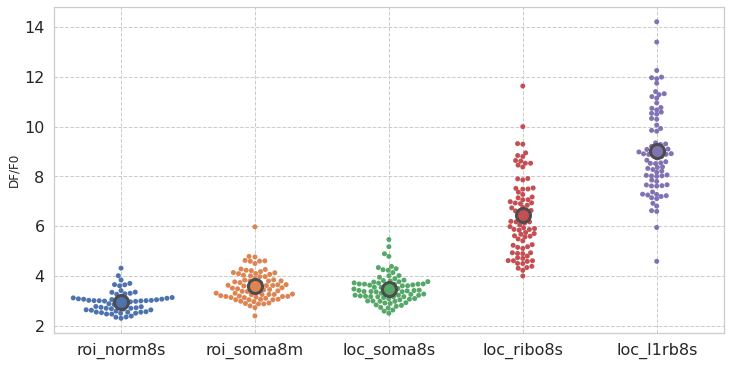

In [3]:
"""Plot soma DF/F0, bar/swarm. """

sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("whitegrid", {"grid.linestyle": "--"})
order = ["roi_norm8s", "roi_soma8m", "loc_soma8s", "loc_ribo8s", "loc_l1rb8s"]
labels = ["jGCaMP8s", "Soma-jGCaMP8m", "Soma-jGCaMP8s", "Ribo-jGCaMP8s", "RiboL1-jGCaMP8s", "RiboL1-jGCaMP8s"]

for ind, n in enumerate(sDFnames):
    ax = sns.swarmplot(
        data=sDFframe[sDFframe.Name == n],
        x="Name",
        y="Values",
        size=5,
        order=order,
    )
    ax = sns.swarmplot(
        data=sDFavgs[sDFavgs.Name == n],
        x="Name",
        y="Values",
        size=14,
        edgecolor="gray",
        linewidth=3,
        linestyle="-",
        order=order,
    )

#ax.set(ylim=(1, 12))
ax.tick_params(labelsize=16)
ax.legend([], [], frameon=False)
ax.set(xlabel="", ylabel="DF/F0")
ax.xaxis.grid(True)
# sns.set_theme()
fig = ax.get_figure()
# fig.savefig("sDF.png", dpi=600)

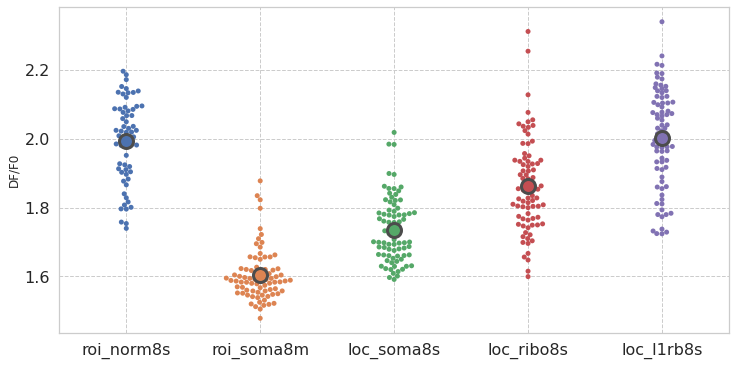

In [4]:
""" Plot Neuropil DF/F0, bar/swarm. """

sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("whitegrid", {"grid.linestyle": "--"})
order = ["roi_norm8s", "roi_soma8m", "loc_soma8s", "loc_ribo8s", "loc_l1rb8s"]
labels = ["jGCaMP8s", "Soma-jGCaMP8m", "Soma-jGCaMP8s", "Ribo-jGCaMP8s", "RiboL1-jGCaMP8s", "RiboL1-jGCaMP8s"]

for ind, n in enumerate(nDFnames):
    ax = sns.swarmplot(
        data=nDFframe[nDFframe.Name == n],
        x="Name",
        y="Values",
        size=5,
        order=order,
    )
    ax = sns.swarmplot(
        data=nDFavgs[nDFavgs.Name == n],
        x="Name",
        y="Values",
        size=14,
        edgecolor="gray",
        linewidth=3,
        linestyle="-",
        order=order
    )

#ax.set(ylim=(1, 12))
ax.tick_params(labelsize=16)
ax.legend([], [], frameon=False)
ax.set(xlabel="", ylabel="DF/F0")
ax.xaxis.grid(True)
# sns.set_theme()
fig = ax.get_figure()
#fig.savefig("nDF.png", dpi=600)

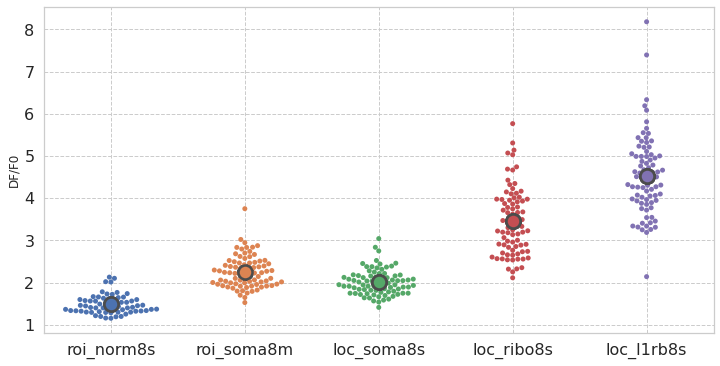

In [6]:
""" Plot Soma/Neuropil DF/F0, bar/swarm. """

sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("whitegrid", {"grid.linestyle": "--"})
order = ["roi_norm8s", "roi_soma8m", "loc_soma8s", "loc_ribo8s", "loc_l1rb8s"]
labels = ["jGCaMP8s", "Soma-jGCaMP8m", "Soma-jGCaMP8s", "Ribo-jGCaMP8s", "RiboL1-jGCaMP8s"]

for ind, n in enumerate(SoverNDFnames):
    ax = sns.swarmplot(
        data=SoverNDFframe[SoverNDFframe.Name == n],
        x="Name",
        y="Values",
        size=5,
        order=order,
    )
    ax = sns.swarmplot(
        data=SoverNDFavgs,
        x="Name",
        y="Values",
        size=14,
        edgecolor="gray",
        linewidth=2.5,
        linestyle="-",
        order=order
    )

#ax.set(ylim=(1, 12))
ax.tick_params(labelsize=16)
ax.legend([], [], frameon=False) #no legend.
#ax.spines["top"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["right"].set_visible(False)

# Add legend with appropriate labels/colors.
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[:6], labels[::6], loc="upper left")
ax.set(xlabel="", ylabel="DF/F0")
ax.xaxis.grid(True)
fig = ax.get_figure()
fig.savefig("sDF_over_nDF.png", dpi=600)

/home/sverre/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


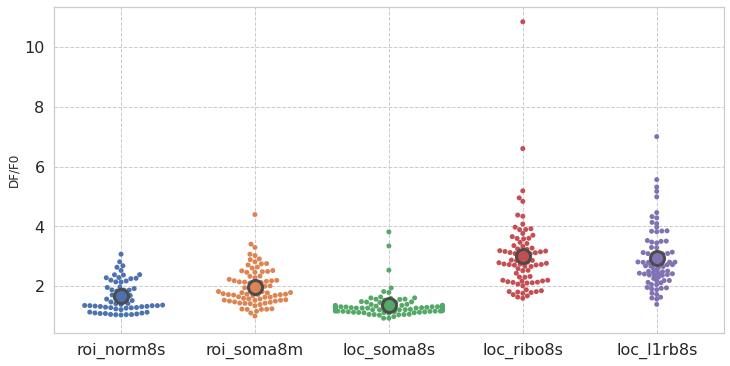

In [7]:
""" Plot Soma/Neuropil raw F, bar/swarm. """
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("whitegrid", {"grid.linestyle": "--"})
order = ["roi_norm8s", "roi_soma8m", "loc_soma8s", "loc_ribo8s", "loc_l1rb8s"]
labels = ["jGCaMP8s", "Soma-jGCaMP8m", "Soma-jGCaMP8s", "Ribo-jGCaMP8s", "RiboL1-jGCaMP8s"]

for ind, n in enumerate(SoverNrawnames):
    ax = sns.swarmplot(
        data=SoverNrawframe[SoverNrawframe.Name == n],
        x="Name",
        y="Values",
        size=5,
        order=order,
    )
    ax = sns.swarmplot(
        data=SoverNrawavgs[SoverNrawavgs.Name == n],
        x="Name",
        y="Values",
        size=14,
        edgecolor="gray",
        linewidth=3,
        linestyle="-",
        order=order
    )

#ax.set(ylim=(1, 12))
ax.tick_params(labelsize=16)
ax.legend([], [], frameon=False)

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[:6], labels[::6], loc="upper left")

#plt.legend(title='Values')
ax.set(xlabel="", ylabel="DF/F0")
ax.xaxis.grid(True)
# sns.set_theme()
fig = ax.get_figure()
# fig.savefig("sDF.png", dpi=600)